In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision.models import alexnet

from lib.datasets import datasets
from lib.utils import train, alex_classifier, pac_label_to_string, save_model, load_model, list_models, compute_error_rate

cuda = torch.cuda.is_available()

# PACS

In [4]:
ds = datasets()
ds.create_dataset('pacs', pacs='art_painting', pacs_heuristic=True, extra=True)
batch_loader = ds.batch_loader(256)

epoch = 50
log_every = 10

Training the model!
Params to learn:
	 features.0.weight
	 features.0.bias
	 features.3.weight
	 features.3.bias
	 features.6.weight
	 features.6.bias
	 features.8.weight
	 features.8.bias
	 features.10.weight
	 features.10.bias
	 classifier.1.weight
	 classifier.1.bias
	 classifier.4.weight
	 classifier.4.bias
	 classifier.6.weight
	 classifier.6.bias
You can interrupt it at any time.
Minibatch     10  | loss  0.64 | err rate 23.00%
Minibatch     20  | loss  0.51 | err rate 15.00%
Minibatch     30  | loss  0.47 | err rate 18.00%
----------------------------------------------------------
After epoch  1 | valid err rate: 47.85% | doing  50 epochs
----------------------------------------------------------
Minibatch     40  | loss  0.39 | err rate 15.00%
Minibatch     50  | loss  0.41 | err rate 13.00%
Minibatch     60  | loss  0.49 | err rate 16.00%
----------------------------------------------------------
After epoch  2 | valid err rate: 44.48% | doing  50 epochs
----------------------

Minibatch    770  | loss  0.37 | err rate 12.00%
Minibatch    780  | loss  0.35 | err rate 12.00%
Minibatch    790  | loss  0.47 | err rate 18.00%
Minibatch    800  | loss  0.30 | err rate 14.00%
----------------------------------------------------------
After epoch 25 | valid err rate: 48.73% | doing  50 epochs
----------------------------------------------------------
Minibatch    810  | loss  0.40 | err rate 14.00%
Minibatch    820  | loss  0.43 | err rate 12.00%
Minibatch    830  | loss  0.37 | err rate 12.00%
----------------------------------------------------------
After epoch 26 | valid err rate: 48.10% | doing  50 epochs
----------------------------------------------------------
Minibatch    840  | loss  0.39 | err rate 16.00%
Minibatch    850  | loss  0.41 | err rate 15.00%
Minibatch    860  | loss  0.43 | err rate 14.00%
----------------------------------------------------------
After epoch 27 | valid err rate: 49.46% | doing  50 epochs
--------------------------------------

Minibatch   1570  | loss  0.40 | err rate 15.00%
Minibatch   1580  | loss  0.36 | err rate 14.00%
Minibatch   1590  | loss  0.43 | err rate 14.00%
Minibatch   1600  | loss  0.22 | err rate 14.00%
----------------------------------------------------------
After epoch 50 | valid err rate: 45.85% | doing  50 epochs
----------------------------------------------------------

Loading best params on validation set (epoch 40)



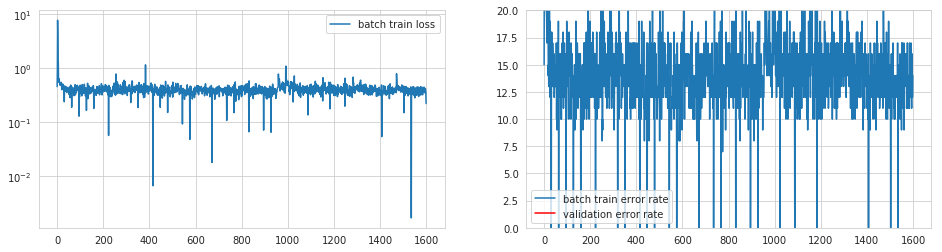

In [6]:
#net = alexnet(pretrained=True)

epoch = 50

# pick what to train

for param in net.parameters():
    param.requires_grad = True
    
#net.classifier = alex_classifier(8)

#criterion = nn.NLLLoss()
optimizer = optim.Adam(net.classifier.parameters(), lr=0.001, weight_decay=1e-2)

train(net, batch_loader, optimizer, criterion, num_epochs = epoch, cuda = cuda, log_every = log_every)
#save_model(net, 'pacs_art_painting_extra')

In [7]:
save_model(net, 'pacs_art_painting_extra')

Training the model!
Params to learn:
	 classifier.1.weight
	 classifier.1.bias
	 classifier.4.weight
	 classifier.4.bias
	 classifier.6.weight
	 classifier.6.bias
You can interrupt it at any time.
Minibatch     10  | loss  1.56 | err rate 67.00%
Minibatch     20  | loss  1.09 | err rate 44.00%
Minibatch     30  | loss  0.87 | err rate 33.00%
----------------------------------------------------------
After epoch  1 | valid err rate: 43.09% | doing  50 epochs
----------------------------------------------------------
Minibatch     40  | loss  0.71 | err rate 25.00%
Minibatch     50  | loss  0.70 | err rate 26.00%
Minibatch     60  | loss  0.71 | err rate 26.00%
----------------------------------------------------------
After epoch  2 | valid err rate: 42.66% | doing  50 epochs
----------------------------------------------------------
Minibatch     70  | loss  0.57 | err rate 20.00%
Minibatch     80  | loss  0.56 | err rate 20.00%
Minibatch     90  | loss  0.44 | err rate 17.00%
--------

Minibatch    760  | loss  0.19 | err rate  6.00%
Minibatch    770  | loss  0.29 | err rate 10.00%
Minibatch    780  | loss  0.21 | err rate  8.00%
----------------------------------------------------------
After epoch 26 | valid err rate: 44.20% | doing  50 epochs
----------------------------------------------------------
Minibatch    790  | loss  0.12 | err rate  4.00%
Minibatch    800  | loss  0.20 | err rate  5.00%
Minibatch    810  | loss  0.15 | err rate  4.00%
----------------------------------------------------------
After epoch 27 | valid err rate: 42.79% | doing  50 epochs
----------------------------------------------------------
Minibatch    820  | loss  0.23 | err rate  9.00%
Minibatch    830  | loss  0.23 | err rate  8.00%
Minibatch    840  | loss  0.18 | err rate  5.00%
----------------------------------------------------------
After epoch 28 | valid err rate: 42.24% | doing  50 epochs
----------------------------------------------------------
Minibatch    850  | loss  0.

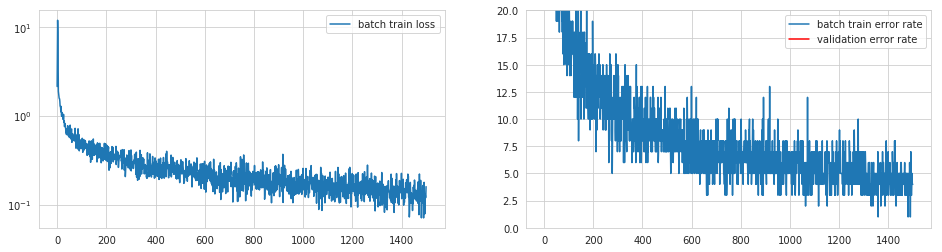

In [5]:
ds.create_dataset('pacs', pacs='cartoon', pacs_heuristic=True, extra = True)
batch_loader = ds.batch_loader(256)

net = alexnet(pretrained=True)

for param in net.parameters():
    param.requires_grad = False
    
net.classifier = alex_classifier(8)

criterion = nn.NLLLoss()
optimizer = optim.Adam(net.classifier.parameters(), lr=0.001)

train(net, batch_loader, optimizer, criterion, num_epochs = epoch, cuda = cuda, log_every = log_every)
save_model(net, 'pacs_cartoon_extra')

Training the model!
Params to learn:
	 classifier.1.weight
	 classifier.1.bias
	 classifier.4.weight
	 classifier.4.bias
	 classifier.6.weight
	 classifier.6.bias
You can interrupt it at any time.
Minibatch     10  | loss  1.85 | err rate 68.00%
Minibatch     20  | loss  1.40 | err rate 59.00%
Minibatch     30  | loss  1.40 | err rate 59.00%
Minibatch     40  | loss  0.98 | err rate 37.00%
Minibatch     50  | loss  1.03 | err rate 40.00%
Minibatch     60  | loss  1.17 | err rate 42.00%
Minibatch     70  | loss  1.15 | err rate 42.00%
Minibatch     80  | loss  1.12 | err rate 42.00%
Minibatch     90  | loss  1.11 | err rate 43.00%
Minibatch    100  | loss  1.10 | err rate 42.00%
Minibatch    110  | loss  1.05 | err rate 37.00%
Minibatch    120  | loss  0.92 | err rate 35.00%
Minibatch    130  | loss  0.77 | err rate 26.00%
----------------------------------------------------------
After epoch  1 | valid err rate: 25.09% | doing  50 epochs
------------------------------------------------

----------------------------------------------------------
After epoch 10 | valid err rate: 20.06% | doing  50 epochs
----------------------------------------------------------
Minibatch   1320  | loss  0.51 | err rate 23.00%
Minibatch   1330  | loss  0.35 | err rate 12.00%
Minibatch   1340  | loss  0.64 | err rate 28.00%
Minibatch   1350  | loss  0.61 | err rate 23.00%
Minibatch   1360  | loss  0.31 | err rate  7.00%
Minibatch   1370  | loss  0.47 | err rate 14.00%
Minibatch   1380  | loss  0.59 | err rate 20.00%
Minibatch   1390  | loss  0.41 | err rate 10.00%
Minibatch   1400  | loss  0.54 | err rate 21.00%
Minibatch   1410  | loss  0.49 | err rate 15.00%
Minibatch   1420  | loss  0.55 | err rate 23.00%
Minibatch   1430  | loss  0.54 | err rate 18.00%
Minibatch   1440  | loss  0.28 | err rate  9.00%
----------------------------------------------------------
After epoch 11 | valid err rate: 24.55% | doing  50 epochs
----------------------------------------------------------
Minibatch

Minibatch   2630  | loss  0.41 | err rate 15.00%
Minibatch   2640  | loss  0.18 | err rate  4.00%
Minibatch   2650  | loss  0.21 | err rate  7.00%
Minibatch   2660  | loss  0.50 | err rate 18.00%
Minibatch   2670  | loss  0.26 | err rate 10.00%
Minibatch   2680  | loss  0.33 | err rate 12.00%
Minibatch   2690  | loss  0.30 | err rate 10.00%
Minibatch   2700  | loss  0.28 | err rate  9.00%
Minibatch   2710  | loss  0.52 | err rate 18.00%
Minibatch   2720  | loss  0.46 | err rate 17.00%
Minibatch   2730  | loss  0.40 | err rate 14.00%
Minibatch   2740  | loss  0.35 | err rate  7.00%
Minibatch   2750  | loss  0.48 | err rate 12.00%
----------------------------------------------------------
After epoch 21 | valid err rate: 24.91% | doing  50 epochs
----------------------------------------------------------
Minibatch   2760  | loss  0.58 | err rate 18.00%
Minibatch   2770  | loss  0.27 | err rate 10.00%
Minibatch   2780  | loss  0.47 | err rate 20.00%
Minibatch   2790  | loss  0.37 | err ra

Minibatch   3950  | loss  0.14 | err rate  4.00%
Minibatch   3960  | loss  0.41 | err rate 17.00%
Minibatch   3970  | loss  0.27 | err rate  7.00%
Minibatch   3980  | loss  0.21 | err rate  6.00%
Minibatch   3990  | loss  0.50 | err rate 14.00%
Minibatch   4000  | loss  0.18 | err rate  4.00%
Minibatch   4010  | loss  0.31 | err rate  9.00%
Minibatch   4020  | loss  0.31 | err rate 10.00%
Minibatch   4030  | loss  0.27 | err rate  9.00%
Minibatch   4040  | loss  0.36 | err rate 17.00%
Minibatch   4050  | loss  0.23 | err rate 10.00%
Minibatch   4060  | loss  0.29 | err rate  9.00%
----------------------------------------------------------
After epoch 31 | valid err rate: 24.01% | doing  50 epochs
----------------------------------------------------------
Minibatch   4070  | loss  0.47 | err rate 21.00%
Minibatch   4080  | loss  0.47 | err rate 17.00%
Minibatch   4090  | loss  0.26 | err rate 10.00%
Minibatch   4100  | loss  0.20 | err rate  6.00%
Minibatch   4110  | loss  0.40 | err ra

Minibatch   5270  | loss  0.39 | err rate 14.00%
Minibatch   5280  | loss  0.32 | err rate 12.00%
Minibatch   5290  | loss  0.34 | err rate 17.00%
Minibatch   5300  | loss  0.67 | err rate 17.00%
Minibatch   5310  | loss  0.47 | err rate 12.00%
Minibatch   5320  | loss  0.33 | err rate 10.00%
Minibatch   5330  | loss  0.32 | err rate 12.00%
Minibatch   5340  | loss  0.44 | err rate 15.00%
Minibatch   5350  | loss  0.27 | err rate  9.00%
Minibatch   5360  | loss  0.41 | err rate 12.00%
Minibatch   5370  | loss  0.36 | err rate 15.00%
----------------------------------------------------------
After epoch 41 | valid err rate: 22.69% | doing  50 epochs
----------------------------------------------------------
Minibatch   5380  | loss  0.41 | err rate 15.00%
Minibatch   5390  | loss  0.18 | err rate  6.00%
Minibatch   5400  | loss  0.21 | err rate  9.00%
Minibatch   5410  | loss  0.35 | err rate 12.00%
Minibatch   5420  | loss  0.42 | err rate 14.00%
Minibatch   5430  | loss  0.34 | err ra

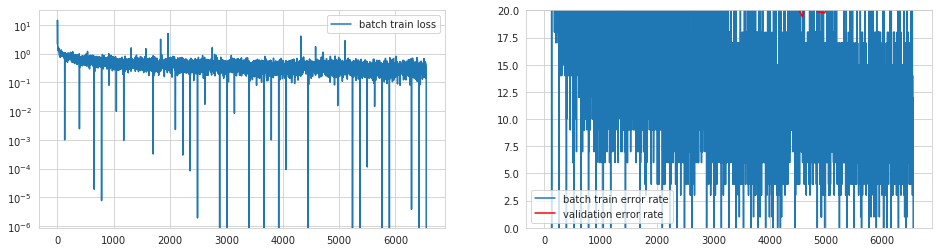

In [4]:
ds = datasets()
ds.create_dataset('pacs', pacs='photo', pacs_heuristic=True, extra = True, data_aug = False)
batch_loader = ds.batch_loader(256)

epoch = 50
log_every = 10

net = alexnet(pretrained=True)

for param in net.parameters():
    param.requires_grad = False
    
net.classifier = alex_classifier(8)

criterion = nn.NLLLoss()
optimizer = optim.Adam(net.classifier.parameters(), lr=0.001, weight_decay=1e-4)

train(net, batch_loader, optimizer, criterion, num_epochs = epoch, cuda = cuda, log_every = log_every)
#save_model(net, 'pacs_photo_extra')

In [3]:
save_model(net, 'pacs_photo_extra')

Training the model!
Params to learn:
	 classifier.1.weight
	 classifier.1.bias
	 classifier.4.weight
	 classifier.4.bias
	 classifier.6.weight
	 classifier.6.bias
You can interrupt it at any time.
Minibatch     10  | loss  1.48 | err rate 55.00%
Minibatch     20  | loss  0.97 | err rate 34.00%
----------------------------------------------------------
After epoch  1 | valid err rate: 54.26% | doing  50 epochs
----------------------------------------------------------
Minibatch     30  | loss  0.69 | err rate 25.00%
Minibatch     40  | loss  0.70 | err rate 25.00%
----------------------------------------------------------
After epoch  2 | valid err rate: 45.46% | doing  50 epochs
----------------------------------------------------------
Minibatch     50  | loss  0.72 | err rate 26.00%
Minibatch     60  | loss  0.49 | err rate 15.00%
Minibatch     70  | loss  0.53 | err rate 20.00%
----------------------------------------------------------
After epoch  3 | valid err rate: 42.84% | doing

Minibatch    670  | loss  0.14 | err rate  5.00%
----------------------------------------------------------
After epoch 28 | valid err rate: 44.18% | doing  50 epochs
----------------------------------------------------------
Minibatch    680  | loss  0.14 | err rate  5.00%
Minibatch    690  | loss  0.18 | err rate  6.00%
----------------------------------------------------------
After epoch 29 | valid err rate: 44.87% | doing  50 epochs
----------------------------------------------------------
Minibatch    700  | loss  0.18 | err rate  6.00%
Minibatch    710  | loss  0.18 | err rate  7.00%
Minibatch    720  | loss  0.15 | err rate  6.00%
----------------------------------------------------------
After epoch 30 | valid err rate: 43.70% | doing  50 epochs
----------------------------------------------------------
Minibatch    730  | loss  0.13 | err rate  3.00%
Minibatch    740  | loss  0.11 | err rate  4.00%
----------------------------------------------------------
After epoch 31 | v

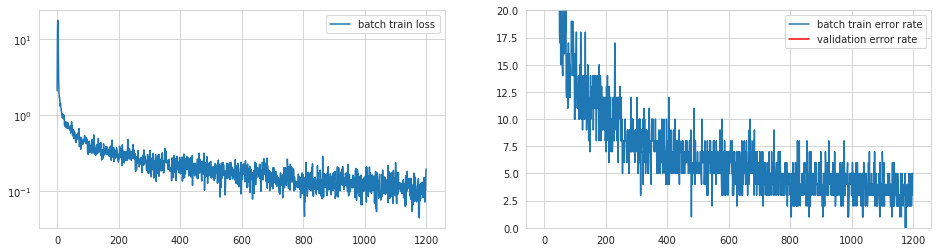

In [7]:
ds.create_dataset('pacs', pacs='sketch', pacs_heuristic=True, extra = True)
batch_loader = ds.batch_loader(256)

net = alexnet(pretrained=True)

for param in net.parameters():
    param.requires_grad = False
    
net.classifier = alex_classifier(8)

criterion = nn.NLLLoss()
optimizer = optim.Adam(net.classifier.parameters(), lr=0.001)

train(net, batch_loader, optimizer, criterion, num_epochs = epoch, cuda = cuda, log_every = log_every)
save_model(net, 'pacs_sketch_extra')

# TESTING PACS FROM SAVED MODELS

In [8]:
list_models()

['pacs_cartoon_full',
 'pacs_sketch_full',
 '.ipynb_checkpoints',
 'pacs_sketch',
 'pacs_sketch_extra',
 'pacs_art_painting_extra',
 'pacs_art_painting_full',
 'pacs_photo_extra',
 'pacs_cartoon',
 'pacs_art_painting',
 'pacs_photo_full',
 'pacs_photo',
 'pacs_cartoon_extra']

In [6]:
e_sum = 0

net = alexnet(pretrained=False)
net.classifier = alex_classifier(8)

# '' or '_full' or '_extra'
var = '_extra' 

for name in ['art_painting', 'cartoon', 'photo', 'sketch']:
    load_model(net, 'pacs_' + name + var)
    if cuda:
        net.cuda()
    
    ds.create_dataset('pacs', pacs=name)
    batch_loader = ds.batch_loader(256)
    
    res = compute_error_rate(net, batch_loader['test'], cuda)
    res = 100 - res
    print('PACS ', name, ' domain accuracy: ', res , "")
    e_sum += res

print('average accuracy for all: ', e_sum / 4.0)

PACS  art_painting  domain accuracy:  57.2265625 
PACS  cartoon  domain accuracy:  61.30546075085324 
PACS  photo  domain accuracy:  81.31736526946108 
PACS  sketch  domain accuracy:  61.97505726648002 
average accuracy for all:  65.45611144669859


In [5]:
e_sum = 0

net = alexnet(pretrained=False)
net.classifier = alex_classifier(8)

# '' or '_full' or '_extra'
var = '_full' 

for name in ['art_painting', 'cartoon', 'photo', 'sketch']:
    load_model(net, 'pacs_' + name + var)
    if cuda:
        net.cuda()
    
    ds.create_dataset('pacs', pacs=name)
    batch_loader = ds.batch_loader(256)
    
    res = compute_error_rate(net, batch_loader['test'], cuda)
    res = 100 - res
    print('PACS ', name, ' domain accuracy: ', res , "")
    e_sum += res

print('average accuracy for all: ', e_sum / 4.0)

PACS  art_painting  domain accuracy:  57.12890625 
PACS  cartoon  domain accuracy:  59.08703071672355 
PACS  photo  domain accuracy:  80.0 
PACS  sketch  domain accuracy:  60.62611351488928 
average accuracy for all:  64.21051262040321
